In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import numpy as np
import cv2 as cv
import mediapipe as mp
import numpy as np
from keras.utils import to_categorical

In [2]:
i = 1
X = []
y = []
while True:
    data = f'C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Classification\\Training Data\\Data{i}.npy'
    labels = f'C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Classification\\Training Data\\Labels{i}.npy'
    try:
        X.append(np.load(data))
        y.append(np.load(labels))
        i += 1
    except FileNotFoundError:
        print("No more files found. Exiting loop.", i-1)
        break

#Convert to numpy arrays
X = np.concatenate(X)
y = np.concatenate(y)
#Now shuffle all data and labels
perm = np.random.permutation(X.shape[0])
X = X[perm].reshape(X.shape[0],19,1)
y = y[perm]
X.shape,y.shape

No more files found. Exiting loop. 26


((6888, 19, 1), (6888, 3))

Now perform 10-fold cross validation.

In [3]:
#Split the data and labels into 10 different groups
data_folds = np.array_split(X,10)
labels_folds = np.array_split(y,10)

In [4]:
#initiallize empty lists, one for the predictions and one for the labels
pred = []
lab = []

#Loop, for each iteration, a single group is used for validation while the rest is used to train a model. Then test on the validation set, returning performance for 10 different cases.
for i in range(10):
    X_val = data_folds[i]
    y_val = np.argmax(labels_folds[i], axis=1)
    
    X_train = np.concatenate(data_folds[:i]+data_folds[i+1:])
    y_train = np.concatenate(labels_folds[:i]+labels_folds[i+1:])
    
    #Now create the model
    model_gru = Sequential()
    model_gru.add(GRU(40, return_sequences=True))
    model_gru.add(GRU(20,return_sequences=True))
    model_gru.add(GRU(15))
    model_gru.add(Dense(3, activation='softmax'))
    
    #Now train the model
    model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model_gru.fit(X_train,y_train, epochs=100, batch_size=20)
    
    #Now make a prediction on the validation set
    result = np.argmax(model_gru.predict(X_val),axis=1)
    
    #Append the prediction to the list
    pred.append(result)
    
    #Append the labels to the list
    lab.append(y_val)

Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5373 - loss: 0.9085
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9153 - loss: 0.2251
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9285 - loss: 0.1775
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9284 - loss: 0.1799
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9255 - loss: 0.1857
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9273 - loss: 0.1712
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9240 - loss: 0.1702
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9327 - loss: 0.1632
Epoch 9/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9285 - loss: 0.1702
Epoch 10/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9310 - loss: 0.1658
Epoch 11/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9336 - loss: 0.1626
Epoch 12/100
310/310 ━━━━━━━━

310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9436 - loss: 0.1370
Epoch 69/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9371 - loss: 0.1445
Epoch 70/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9402 - loss: 0.1357
Epoch 71/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9429 - loss: 0.1364
Epoch 72/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9446 - loss: 0.1336
Epoch 73/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9460 - loss: 0.1306
Epoch 74/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9477 - loss: 0.1266
Epoch 75/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9458 - loss: 0.1294
Epoch 76/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9441 - loss: 0.1323
Epoch 77/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9493 - loss: 0.1188
Epoch 78/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9375 - loss: 0.1347
Epoch 79/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5620 - loss: 0.8819
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9173 - loss: 0.2207
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9188 - loss: 0.1930
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9183 - loss: 0.2023
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9268 - loss: 0.1845
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9244 - loss: 0.1761
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9224 - loss: 0.1824
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9241 - loss: 0.1761
Epoch 9/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9211 - loss: 0.1763
Epoch 10/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9184 - loss: 0.1802
Epoch 11/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9223 - loss: 0.1789
E

310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9331 - loss: 0.1534
Epoch 34/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9341 - loss: 0.1498
Epoch 35/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9339 - loss: 0.1537
Epoch 36/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9355 - loss: 0.1524
Epoch 37/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9287 - loss: 0.1629
Epoch 38/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9339 - loss: 0.1537
Epoch 39/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9386 - loss: 0.1455
Epoch 40/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9322 - loss: 0.1581
Epoch 41/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9354 - loss: 0.1437
Epoch 42/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9403 - loss: 0.1421
Epoch 43/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9400 - loss: 0.1428
Epoch 44/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 

310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9414 - loss: 0.1351
Epoch 67/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9407 - loss: 0.1433
Epoch 68/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9415 - loss: 0.1400
Epoch 69/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9379 - loss: 0.1412
Epoch 70/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9404 - loss: 0.1348
Epoch 71/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9414 - loss: 0.1352
Epoch 72/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9350 - loss: 0.1443
Epoch 73/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9391 - loss: 0.1368
Epoch 74/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9452 - loss: 0.1386
Epoch 75/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9422 - loss: 0.1355
Epoch 76/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9306 - loss: 0.1524
Epoch 77/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 

310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9446 - loss: 0.1390
Epoch 100/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9375 - loss: 0.1362
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6393 - loss: 0.8261
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9112 - loss: 0.2180
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9256 - loss: 0.1881
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9218 - loss: 0.1887
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9320 - loss: 0.1714
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9268 - loss: 0.1773
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9258 - loss: 0.1762
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9244 - loss: 0.1713
Epoch 9/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9325 - loss: 0.1659
Epoch 10/100


310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9374 - loss: 0.1498
Epoch 32/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9422 - loss: 0.1456
Epoch 33/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9324 - loss: 0.1539
Epoch 34/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9309 - loss: 0.1561
Epoch 35/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9352 - loss: 0.1540
Epoch 36/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9360 - loss: 0.1550
Epoch 37/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9344 - loss: 0.1616
Epoch 38/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9306 - loss: 0.1574
Epoch 39/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9381 - loss: 0.1450
Epoch 40/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9339 - loss: 0.1557
Epoch 41/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9334 - loss: 0.1591
Epoch 42/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 

310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9352 - loss: 0.1489
Epoch 65/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9381 - loss: 0.1407
Epoch 66/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9360 - loss: 0.1479
Epoch 67/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9418 - loss: 0.1374
Epoch 68/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9344 - loss: 0.1531
Epoch 69/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9417 - loss: 0.1409
Epoch 70/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9404 - loss: 0.1411
Epoch 71/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9389 - loss: 0.1418
Epoch 72/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9381 - loss: 0.1370
Epoch 73/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9392 - loss: 0.1462
Epoch 74/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9398 - loss: 0.1439
Epoch 75/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 

310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9467 - loss: 0.1227
Epoch 98/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9510 - loss: 0.1213
Epoch 99/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9474 - loss: 0.1196
Epoch 100/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9436 - loss: 0.1279
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [30]:
np.mean(acc_0),np.mean(acc_1),np.mean(acc_2), np.mean([np.mean(acc_0),np.mean(acc_1),np.mean(acc_2)])

(0.8938398631551993,
 0.9560606721949849,
 0.9568387345437872,
 0.9355797566313239)

In [15]:
Pred = np.array([item for sublist in pred for item in sublist])
Lab = np.array(np.array([item for sublist in lab for item in sublist]))

In [21]:
#Saved them in case we need to reload them
np.save("C:\\Users\\Cian\\Downloads\\Pred_Class_10Fold.npy",Pred)
np.save("C:\\Users\\Cian\\Downloads\\Lab_Class_10Fold.npy",Lab)

In [2]:
Pred = np.load("C:\\Users\\Cian\\Downloads\\Pred_Class_10Fold.npy")
Lab = np.load("C:\\Users\\Cian\\Downloads\\Lab_Class_10Fold.npy")

Now just create a confusion matrix with the results

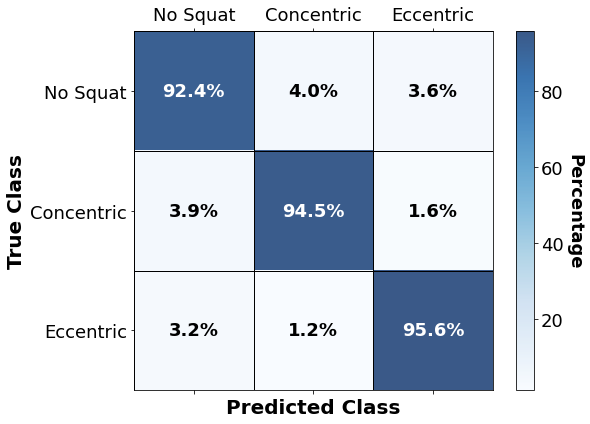

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your arrays)
y_pred = Pred
y_true = Lab

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot settings
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size if needed
cax = ax.matshow(cm_percent, cmap='Blues', alpha=0.8)

# Add colorbar
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('Percentage', rotation=270, labelpad=20, fontsize=18, weight='bold')
cbar.ax.tick_params(labelsize=18)  # This line adjusts the tick labels

# Dynamic text colors and grid lines
for (i, j), val in np.ndenumerate(cm_percent):
    text_color = 'white' if i == j or cm_percent[i, j] > 60 else 'black'
    ax.text(j, i, f'{val:.1f}%', ha='center', va='center', color=text_color, fontsize=18, weight='bold')

# Set class labels (rotated y-axis labels)
labels = ['No Squat', 'Concentric', 'Eccentric']
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, fontsize=18)  # x-axis labels horizontal
ax.set_yticklabels(labels, fontsize=18)  # Rotate y-axis labels vertical

# Grid lines for clarity
ax.set_xticks(np.arange(-.5, len(labels), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(labels), 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
ax.tick_params(which='minor', size=0)  # Hide minor ticks

# Axis labels with bold font and larger size
plt.xlabel('Predicted Class', fontsize=20, weight='bold')
plt.ylabel('True Class', fontsize=20, weight='bold')

# Tight layout and high-res export
plt.tight_layout()
plt.savefig("C:\\Users\\Cian\\Downloads\\confusion_matrix_final_clean.png", dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()
